In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

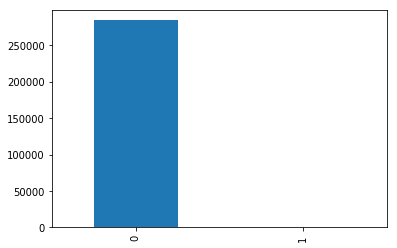

In [6]:
data['Class'].value_counts().plot(kind='bar')

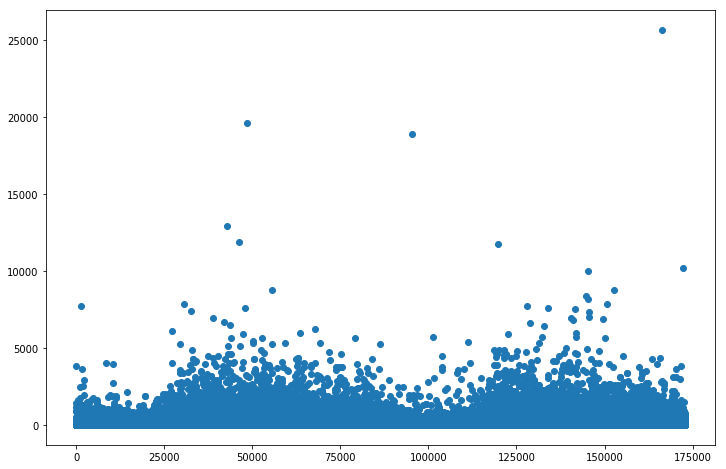

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(data.Time, data.Amount)

In [8]:
Fraud = data[data['Class']==1]
Normal = data[data['Class']==0]

In [37]:
data.insert(1,'hour',data['Time'].apply(lambda x: np.ceil(x/3600)%24))

In [38]:
data.head()

,Time,hour,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.pivot_table(values='Amount',index='hour', columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


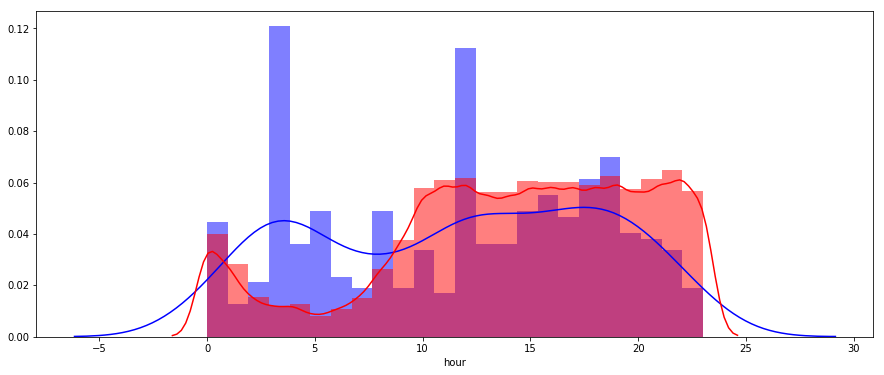

In [14]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.distplot(data[data['Class']==1]['hour'],
            norm_hist=True,
            bins=24,
            kde=True,
            color='b',
            hist_kws={'alpha':0.5})
sns.distplot(data[data['Class']==0]['hour'],
            norm_hist=True,
            bins=24,
            kde=True,
            color='r',
            hist_kws={'alpha':0.5})

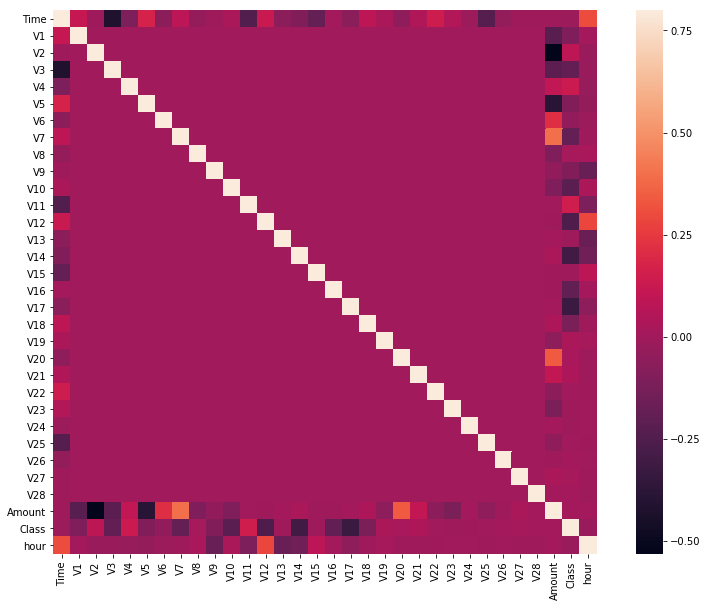

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)

In [39]:
data.head()

,Time,hour,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
 train_X,test_X,train_y,test_y = train_test_split(data.loc[:,'hour':'Amount'],data.loc[:,'Class'],test_size=0.3)

In [41]:
train_X.head()

,hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
273082,22.0,-0.633553,1.144576,0.697639,1.335661,0.252508,-0.063225,0.646169,-0.558351,1.186726,...,0.516280,0.135031,1.337013,-0.502165,-0.004953,0.086449,0.425438,-0.278955,-0.094977,5.10
84752,17.0,-2.128800,1.724691,1.216850,-1.360936,-0.716862,-1.477270,0.453765,0.032440,0.706417,...,0.466976,-0.149143,-0.105486,-0.033005,0.966929,-0.220647,0.648530,0.144443,0.137710,7.68
155527,6.0,1.659492,-1.038713,0.887125,1.930799,-1.356343,1.280298,-1.657453,0.549063,3.665266,...,-0.236677,0.034746,0.665968,0.034867,-0.463876,-0.229493,-0.510315,0.083377,-0.027281,87.00
35992,11.0,1.175082,0.134155,-0.140764,0.966419,0.650834,0.950973,0.046039,0.145220,-0.054677,...,-0.015395,-0.112435,-0.109493,-0.276837,-1.300792,0.845472,-0.251621,0.037773,-0.001657,30.75
233051,17.0,1.847132,-0.557696,-0.472419,0.310227,-0.548457,-0.189089,-0.484880,0.070696,1.055271,...,-0.082994,-0.117179,-0.365302,0.257999,-0.450918,-0.433190,-0.623874,0.018317,-0.034058,69.99


In [42]:
train_X.shape

(199364, 30)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression(class_weight={0:1,1:100})

In [45]:
model.fit(train_X,train_y)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 100}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [46]:
Predicty=model.predict_proba(test_X)

In [48]:
Predicty

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

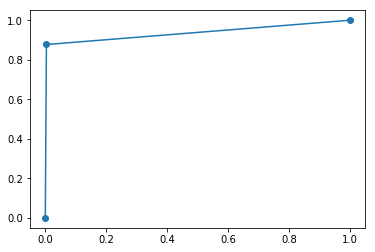

In [54]:
fpr, tpr, thresholds = roc_curve(test_y,Predicty, pos_label=1)
plt.plot(fpr,tpr,marker = 'o')

In [50]:
auc_score = roc_auc_score(test_y,Predicty)

In [51]:
auc_score

0.9368151754163837

In [ ]:
def get_TP(y_true, y_pred):
    return sum((y_true==1)&(y_pred==1))

def get_FP(y_true, y_pred):
    return sum((y_true==0)&(y_pred==1))

def get_FN():
    return sum((y_true==1)&(y_pred==0))

def get_TN():
    return sum((y_true==0)&(y_pred==0))

precise=TP/(TP+FP)
recall=TP/(TP+FN)
fpr=FP/TN+FP
tpr=TP/TP+FN